In [ ]:
import pandas as pd
import numpy as np

credit_df = pd.read_csv( "German_Credit_Data.csv" )
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [1]:
X_features = list( credit_df.columns )
X_features.remove( 'status' )
X_features

NameError: name 'credit_df' is not defined

In [ ]:
encoded_credit_df = pd.get_dummies( credit_df[X_features], 
                                   drop_first = True )

In [ ]:
list(encoded_credit_df.columns)

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'savings_acc_A62',
 'savings_acc_A63',
 'savings_acc_A64',
 'savings_acc_A65',
 'present_emp_since_A72',
 'present_emp_since_A73',
 'present_emp_since_A74',
 'present_emp_since_A75',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A142',
 'inst_plans_A143',
 'job_A172',
 'job_A173',
 'job_A174']

In [ ]:
import statsmodels.api as sm

Y = credit_df.status
X = sm.add_constant( encoded_credit_df )

In [ ]:
Y = credit_df.status
X = encoded_credit_df

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split( X, Y, 
                                                    test_size = 0.3,
                                                    random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion = 'gini', 
                                  max_depth = 3 )

In [ ]:
clf_tree.fit( X_train, y_train )

DecisionTreeClassifier(max_depth=3)

In [ ]:
from sklearn import metrics
tree_predict = clf_tree.predict( X_test )
metrics.roc_auc_score( y_test, tree_predict )

np.float64(0.5835743204164258)

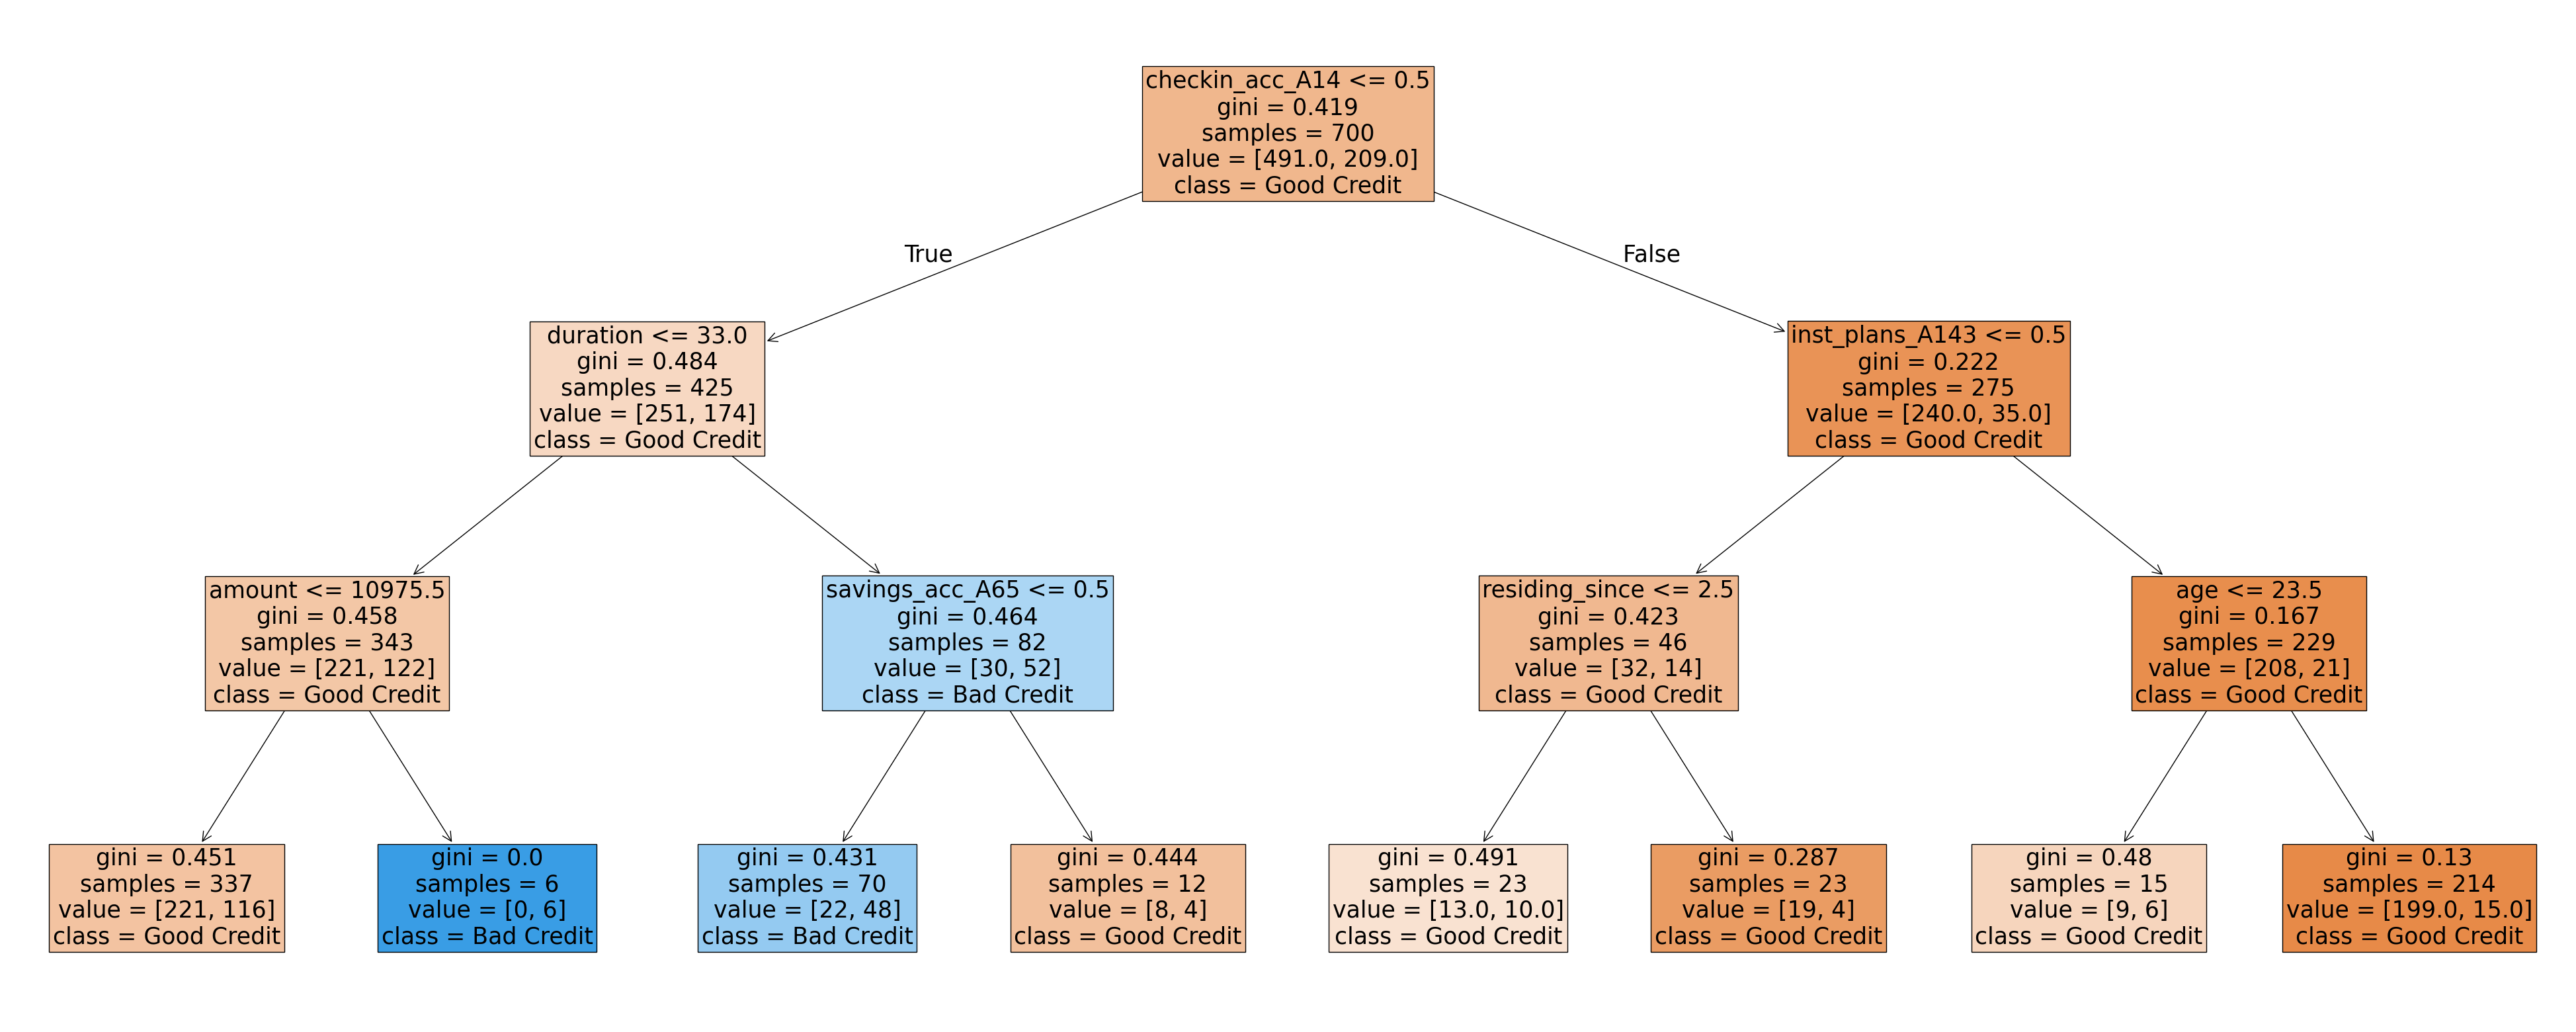

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (50, 20))
plot_tree(clf_tree,
          feature_names = X_train.columns,
          class_names = ['Good Credit', 'Bad Credit'],
          filled = True,
          fontsize = 25);

In [ ]:
gini_node_1 = 1 - pow(491/700, 2) - pow (209/700, 2)
print( round( gini_node_1, 4) )

0.4189


In [ ]:
X_test.shape

(300, 29)

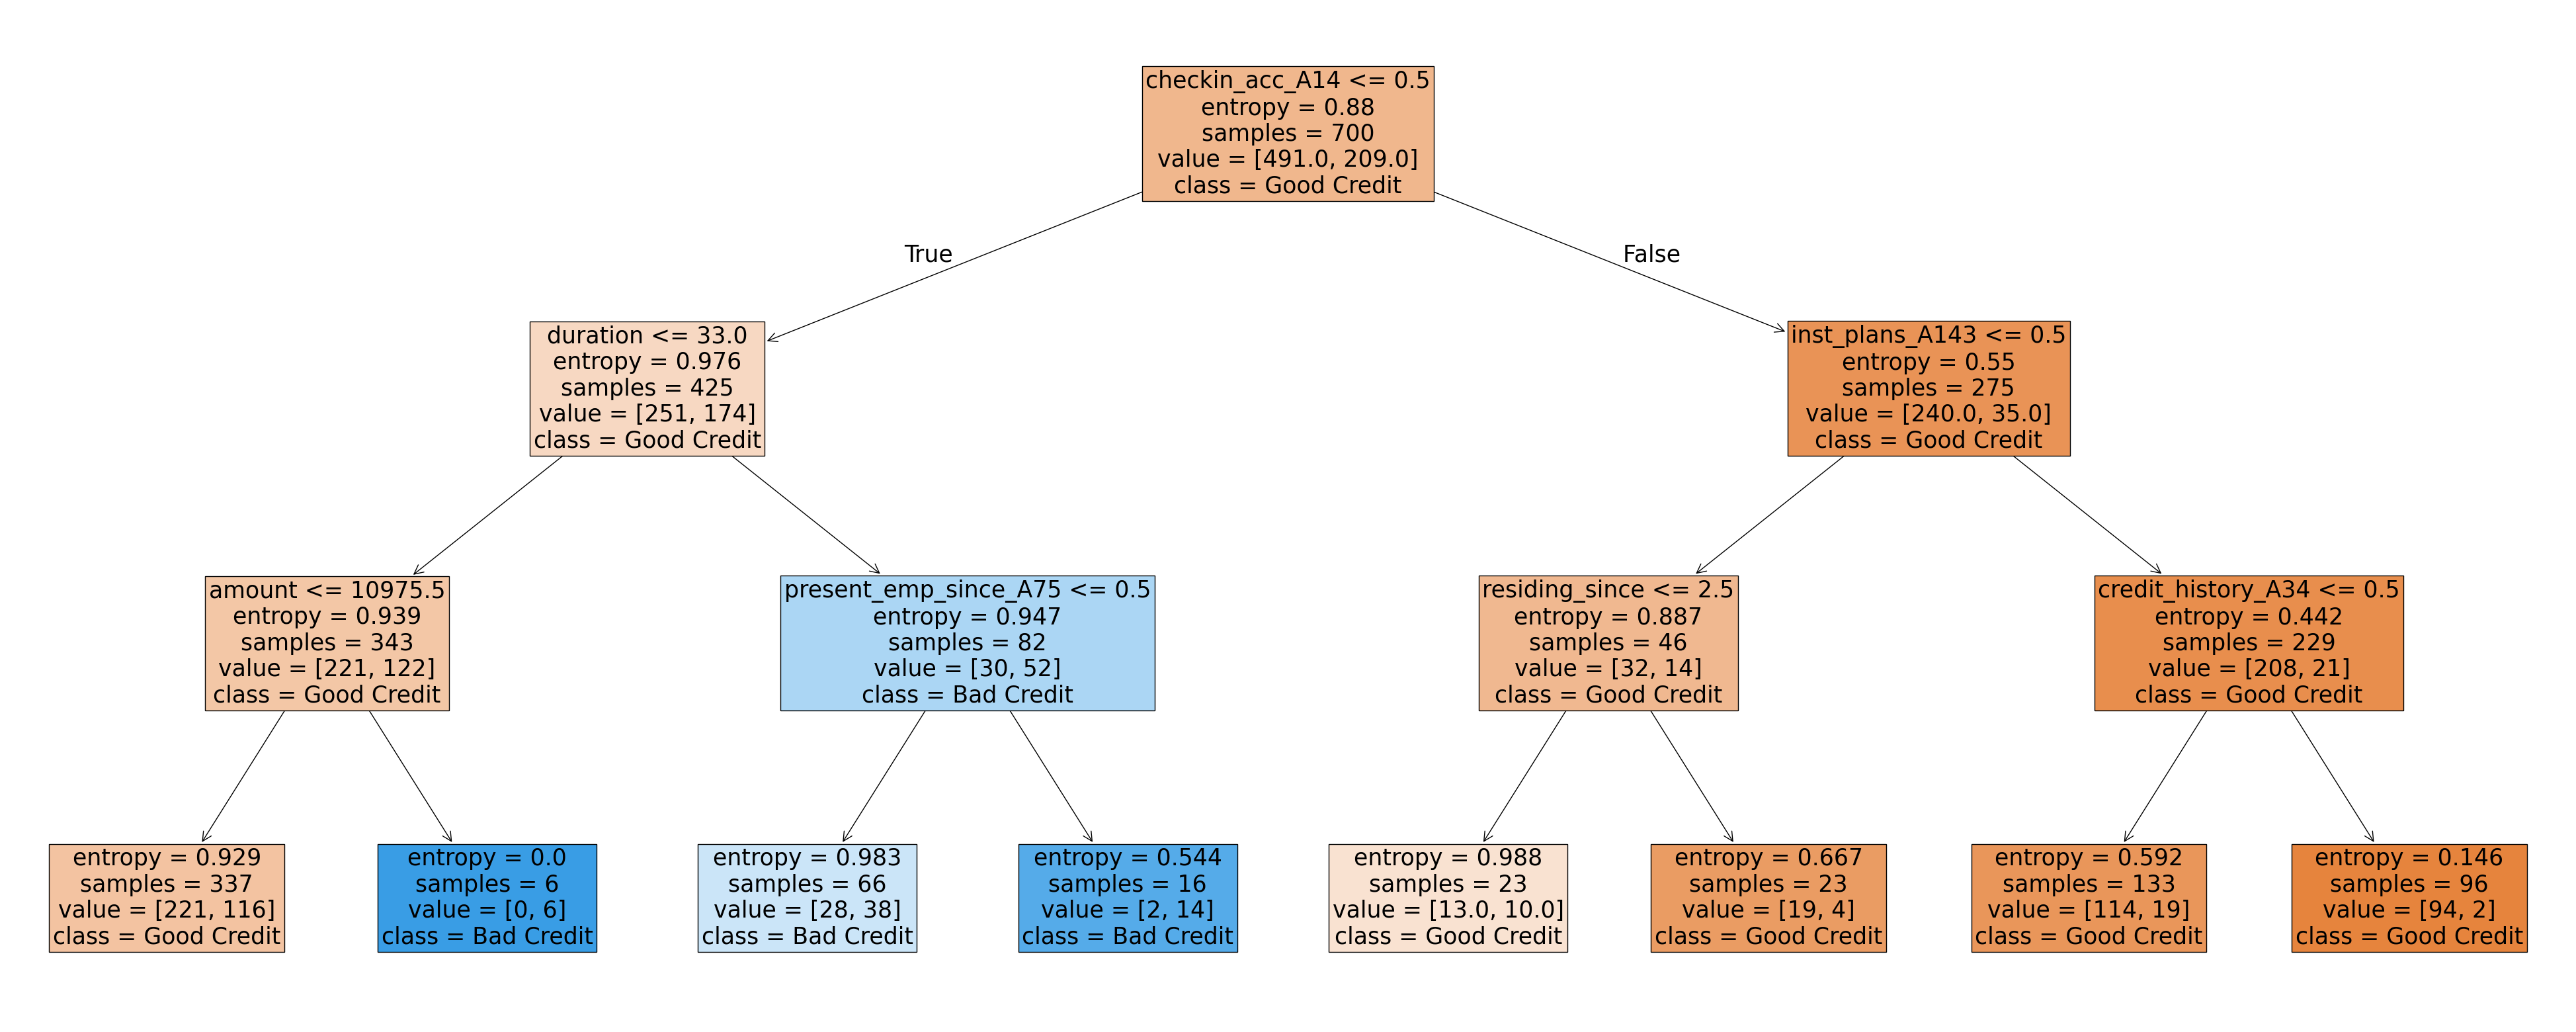

In [ ]:
clf_tree_entropy = DecisionTreeClassifier( criterion = 'entropy', 
                                          max_depth = 3 )
clf_tree_entropy.fit( X_train, y_train )

plt.figure(figsize = (50, 20))
plot_tree(clf_tree_entropy,
          feature_names = X_train.columns,
          class_names = ['Good Credit', 'Bad Credit'],
          filled = True,
          fontsize = 25);

In [ ]:
import math

entropy_node_1 = - (491/700) * math.log2(491/700) - (209/700) * math.log2(209/700)
print( round( entropy_node_1, 2) )

0.88


In [ ]:
tree_predict = clf_tree_entropy.predict( X_test )
metrics.roc_auc_score( y_test, tree_predict )

np.float64(0.5763972869236027)

In [ ]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion': ['gini','entropy'], 
                     'max_depth': range(2,10)}]


clf_tree = DecisionTreeClassifier()

clf = GridSearchCV(clf_tree,
                 tuned_parameters,
                 cv=10,
                 scoring='roc_auc')

clf.fit(X_train, y_train )

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [ ]:
clf.best_score_

np.float64(0.6833090864917397)